In [12]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import math 
from scipy import misc

In [13]:
def series_sum(D,h, lower_bound, upper_bound):
    values = np.linspace(lower_bound, upper_bound, 100)
    interpolant = np.zeros(shape = 100)
    i = 0
    for x in values:
        sum = 0
        for m in range(-10000, 10001):
            exponent = -((x-m*h)*(x-m*h))/(D*h*h)
            sum += 1/math.sqrt(math.pi*D) * math.sin(m*h) * math.exp(exponent)
        interpolant[i] = sum
        i += 1
    return values, interpolant 

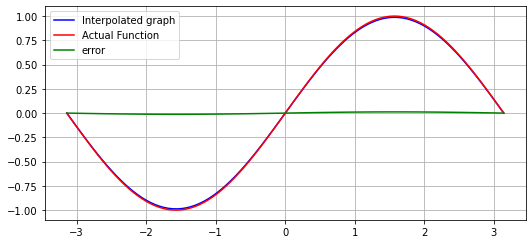

In [14]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def f(x):
   return np.sin(x)

x = np.linspace(-math.pi, math.pi, 100)

plt.grid()
values, interpolant = series_sum(5, 0.1, -math.pi, math.pi)
plt.plot(values, interpolant, color = 'blue', label = 'Interpolated graph')
plt.plot(x, f(x), color = 'red', label = 'Actual Function')
plt.plot(x, f(x) - interpolant, color = 'green', label = 'error')
plt.legend()
plt.show()

In [15]:
def quasi_interpolant(x,y, D, h):
    # Inputs the values of x, y and gives the infinite sum of the series
    sum = 0
    for m1 in range(-100, 101):
        for m2 in range(-100, 101):
            exponent = -((x-m1*h)**2+(y-m2*h)**2)/(D*h**2)
            sum += 1/(math.pi * D) * (1.464*m1*h+5.90*m2*h) * math.exp(exponent)
    return sum

In [16]:
X = np.linspace(-4, 4, 200)
Y = np.linspace(-4, 4, 200)

In [17]:
coord_rect = []
for x in X:
    for y in Y:
        if (y - 0.692*x + 5 > 0 ) and (y - 0.692*x - 5 < 0) and (-y - x / 0.692 - 6 < 0) and (-y - x / 0.692 + 6 > 0):
            coord_rect.append([x, y])
print(len(coord_rect))

30816


In [18]:
ellipse_coord = []
for x,y in coord_rect:
    if(1.7363*x*x + 2*.3660*x*y + 1.4729*y*y < 15.8091):
        ellipse_coord.append([x,y])
print(len(ellipse_coord))

19742


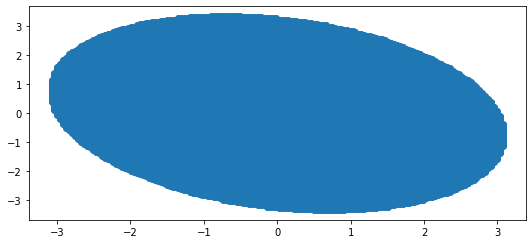

In [19]:
np_coord_ellipse = np.array(ellipse_coord)

fig = plt.figure()
# Set the figure size
plt.rcParams["figure.figsize"] = [9.0, 9.0]
plt.rcParams["figure.autolayout"] = True

# Random data of 100×3 dimension

# Scatter plot
plt.scatter(np_coord_ellipse[:, 0], np_coord_ellipse[:, 1])

# Display the plot
plt.show()

In [20]:
print(np_coord_ellipse)

[[-3.07537688  0.38190955]
 [-3.07537688  0.42211055]
 [-3.07537688  0.46231156]
 ...
 [ 3.07537688 -0.46231156]
 [ 3.07537688 -0.42211055]
 [ 3.07537688 -0.38190955]]


In [21]:
actual_feedback = 1.464*np_coord_ellipse[:, 0] + 5.90*np_coord_ellipse[:, 1]
print(actual_feedback)

[-2.24908543 -2.0118995  -1.77471357 ...  1.77471357  2.0118995
  2.24908543]


In [25]:
quasi_feedback = np.array([quasi_interpolant(x,y,2, 0.5) for (x,y) in np_coord_ellipse])
np.savetxt("feedback_2_5e-1.txt", quasi_feedback)

In [26]:
print(np.max(quasi_feedback - actual_feedback))
print(np.min(quasi_feedback - actual_feedback))

2.468167430436097e-07
-2.468167430436097e-07


In [27]:
error = np.abs(quasi_feedback - actual_feedback)
print(error)

[1.10707977e-07 8.99816812e-08 5.12153813e-08 ... 5.12153824e-08
 8.99816839e-08 1.10707978e-07]


In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# plotting the points
ax.scatter3D(np_coord_ellipse[:, 0],np_coord_ellipse[:, 1], error, cmap='Greens');


ax.set_xlim3d(-8, 8)
ax.set_ylim3d(-8, 8)
ax.set_zlim3d(0, 2e-13)

plt.show()

In [ ]:
print(np_coord_ellipse)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# plotting the points
ax.scatter3D(np_coord_ellipse[:, 0],np_coord_ellipse[:, 1], error, cmap='Greens');


ax.set_xlim3d(-8, 8)
ax.set_ylim3d(-8, 8)
ax.set_zlim3d(0, 2e-13)

plt.show()

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# plotting the points


ax.plot_trisurf(np_coord_ellipse[:, 0],np_coord_ellipse[:, 1], error, cmap='viridis', edgecolor='none')


ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
ax.set_zlim3d(0, 2e-13)

plt.show()

In [ ]:
print(quasi_feedback.shape)
print(np_coord_ellipse.shape)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams['text.usetex'] = False
# plotting the points
ax.plot_surface(np_coord_ellipse[:, 0],np_coord_ellipse[:, 1], quasi_feedback)


ax.set_xlim3d(-4, 4)
ax.set_ylim3d(-4, 4)
ax.set_zlim3d(0, 2e-13)

plt.show()

In [ ]:
graph_plot = np.zeros(shape = (100,100))

In [ ]:
graph_X = np.linspace(-3,3,100)
graph_Y = np.linspace(-0.3, 0.3, 100)

In [ ]:
i = 0
for x in graph_X:
    j = 0
    for y in graph_Y:
        graph_plot[i][j] = quasi_interpolant(x,y,5, 0.1)
        j += 1
    i += 1

In [ ]:
print(graph_plot.shape)


In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams["figure.figsize"] = [4.0, 4.0]
# plotting the points
ax.plot_trisurf(np_coord_ellipse[:, 0],np_coord_ellipse[:, 1], quasi_feedback, cmap='viridis', edgecolor='none')
plt.show()

In [ ]:
actual_graph_plot = 1.464*np_coord_ellipse[:, 0] + 5.90*np_coord_ellipse[:, 1]

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams["figure.figsize"] = [4.0, 4.0]
# plotting the points
ax.plot_trisurf(np_coord_ellipse[:, 0],np_coord_ellipse[:, 1], actual_graph_plot, cmap='viridis', edgecolor='none')
plt.show()

In [ ]:
plt.savefig('destination_path.eps', format='eps')

In [ ]:
np.savetxt("feedback_5_e-1.txt", quasi_feedback)

In [ ]:
array = np.loadtxt("feedback_5_e-1.txt")
print(quasi_feedback.shape)

In [ ]:
print((array == quasi_feedback).sum())